In [1]:
import  numpy as np
import  scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles #esta es una fnucion que contiene unos datos ya estipulados de lo cuales sacamos para establecer el probelma de la red neuronal.

(500, 1)


<function matplotlib.pyplot.show>

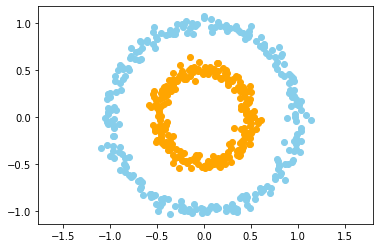

In [2]:
n = 500 #este es la cantidad de poblacion a analizar
p = 2 #estos son los parametros que tenemos para evaluar.

x , y = make_circles(n_samples = n, factor = 0.5, noise= 0.05) #aqui establecemos los valores tanto de la entrada como de salidad, basados en los datos que nos proporciona la funcion.
#nos exige principalmente 2 parametros, el primero establece la poblacion a anlizar, el segundo nos da la distribucion o distancia entre los dos circulos y el tercero hace que los elementos tengan una variacion para que sea un circulo perfecto.
y = y[:,np.newaxis]
print(y.shape)
plt.scatter(x[y[:, 0] == 0,0],x[y[:, 0] == 0,1], c = "skyblue") #aqui decimos que estraeremos estrallendo los datos y de que parametro para poder generar un grafico.
plt.scatter(x[y[:, 0] == 1,0],x[y[:, 0] == 1,1], c = "orange") # esto sirve para dar una mejor presentacion y poder establecer colores por separado para cada grupo de datos.
plt.axis("equal") # aqui decimos que queremos que los ejes X y Y tengan ula misma longitud.
plt.show

In [9]:
#creacion de funcion para la clase de la capa de la red 
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

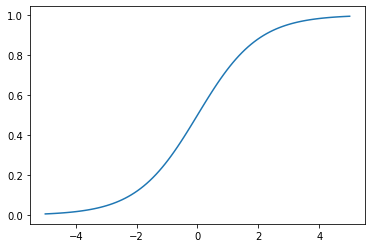

In [16]:
# funciones de activacion
sigm = (lambda x: 1 / (1 + np.e ** (-x)), #esta es la funcion que sirve como activador pero para poder sacar se utilizara el indice [0]. esto se hizo para una mayor facilidad y mejor limpieza en el codigo.
        lambda x: x * (1 - x)) # esta es la funcion que nos dara la derivada de la funcion de activacion para el uso del backpropagation. con un indice [1]

relu = lambda x: np.maximum(0,x)
_x= np.linspace(-5,5,100)
plt.plot(_x,sigm[0](_x))

In [5]:
#cracion de la funcion para crear la red neuronal
def create_nn(topology, act_f):
  
  nn = []#aqui se contendra las capas de la red. 
  
  for l, layer in enumerate (topology[:-1]): #la funcion "enumerate" sirve apra indicar tanto el indice como el objeto
    nn.append(neural_layer(topology[l], topology[l+1],act_f))
  return nn

topology = [p, 4, 8, 16, 8, 4, 1] #esto es una variable que nos definira cuantas neuronas tendra por capa la red neuronal. es importante que en la ultima solo se ponga 1 por que no interesa un resultado binario
create_nn(topology,sigm)

In [33]:
topology = [p, 4, 8, 1] #esto es una variable que nos definira cuantas neuronas tendra por capa la red neuronal. es importante que en la ultima solo se ponga 1 por que no interesa un resultado binario

neural_net = create_nn(topology,sigm)

l2_cost= (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: (Yp-Yr))

#codigo de entrenamiento de la red
def train(neural_net, x, y, l2_cost, lr=0.5, train= True):
  out = [(None,x)]
  #forward pass: unicamente poner el vector de entrada y pasarlo capa por capa ejecutando cada una de las operaciones que se realizan 
  for l, layer in enumerate (neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #esta es la suma pondera 
    a = neural_net[l].act_f[0](z) #esta es la saldiad de la capa n
    out.append((z,a))

  if train:
    #backward pass
    delta = []
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]

      if l ==  len(neural_net) - 1:
        delta.insert(0,l2_cost[1](a,y)*neural_net[1].act_f[1](a))
        #calcular de la ultima capa
      else:
        delta.insert(0,delta[0]@_W.T*neural_net[1].act_f[1](a))
        #calcular delta respecto a la capa previa
      _W = neural_net[l].W
      #descenso del gradiente
      neural_net[l].b = neural_net[l].b - np.mean(delta[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ delta[0] * lr
  return out[-1][1]

train(neural_net,x,y,l2_cost,0.5)
print("")

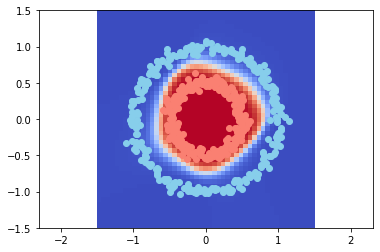

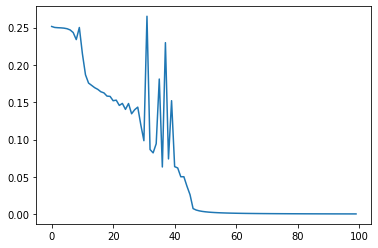

In [36]:
import time 
from IPython.display import clear_output
neural_n = create_nn(topology,sigm) #aqui se crea un nueva red neuronal
loss = [] #aqui se guardaran los diferentes costes que se obtengan

for i in range (2500):
  pY = train(neural_n, x, y, l2_cost,lr=0.05)

  if i % 25 == 0:
    loss.append(l2_cost[0](pY, y))  
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y= np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = train(neural_n, np.array([[x0,x1]]), y, l2_cost, train= False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _y, cmap= "coolwarm")
    plt.axis("equal")

    plt.scatter(x[y[:,0] == 0, 0], x[y[:,0]==0, 1],c="skyblue")
    plt.scatter(x[y[:,0] == 1, 0], x[y[:,0]==1, 1],c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.5)
